# Appendix

In [1]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine.options as p9options

p9options.figure_size = (5.4, 4.8)
theme_set(theme_minimal())

In [2]:
# dataset packages
from pysocviz.loader import load_dataset

bad_date = load_dataset('bad_date')
asasec = load_dataset('asasec')

# for Fig. A.6
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## Fig. A.3

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


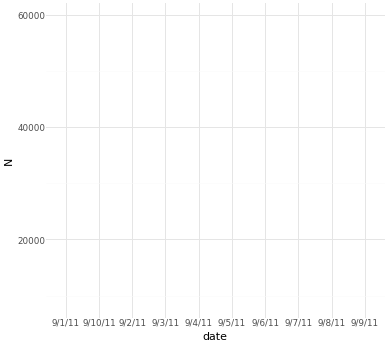

In [3]:
p = ggplot(bad_date, aes(x='date', y='N'))
p + geom_line()

## Fig. A.4

In [4]:
bad_date2 = pd.concat([bad_date, bad_date])

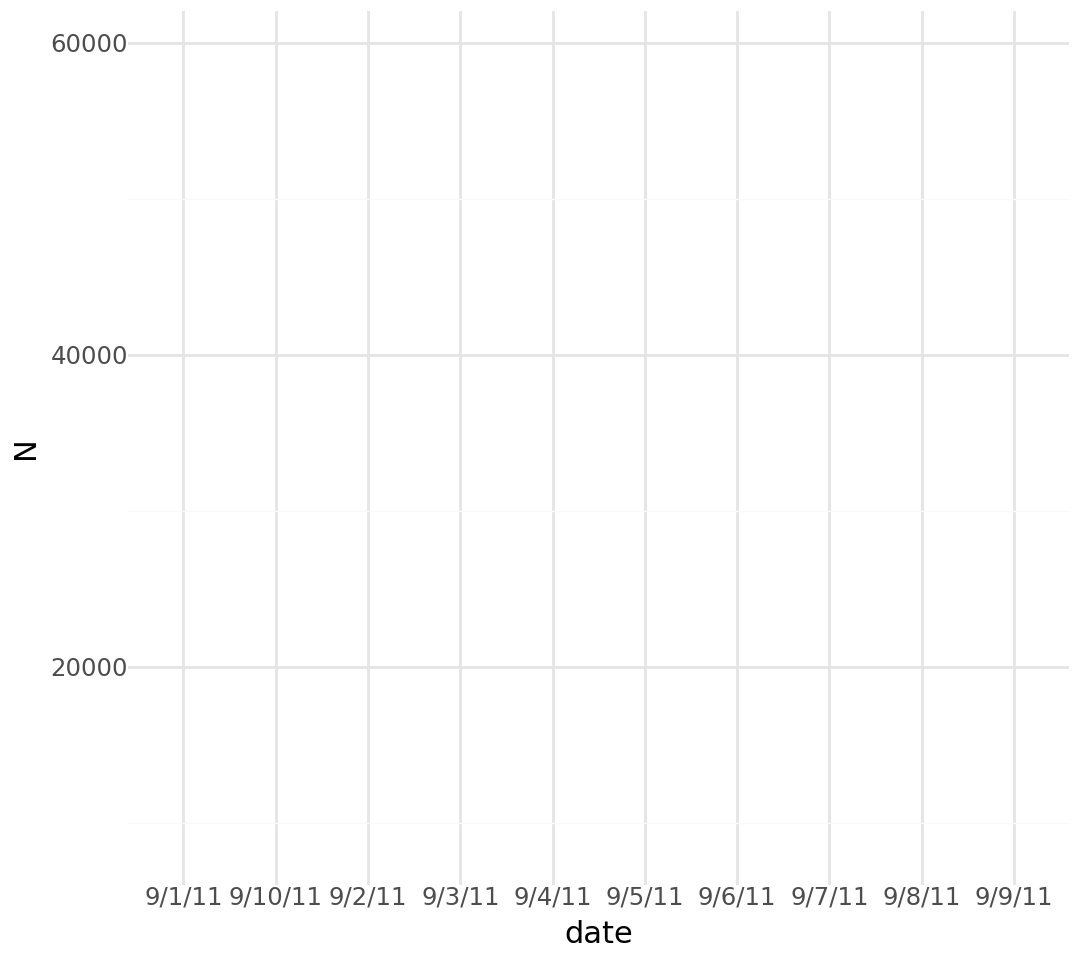

In [5]:
p = ggplot(bad_date2, aes(x='date', y='N'))
p + geom_line()

## Fig. A.5

Of course, **lubridate** package is not available in Python. You can directly transform the type of `date` with pandas.

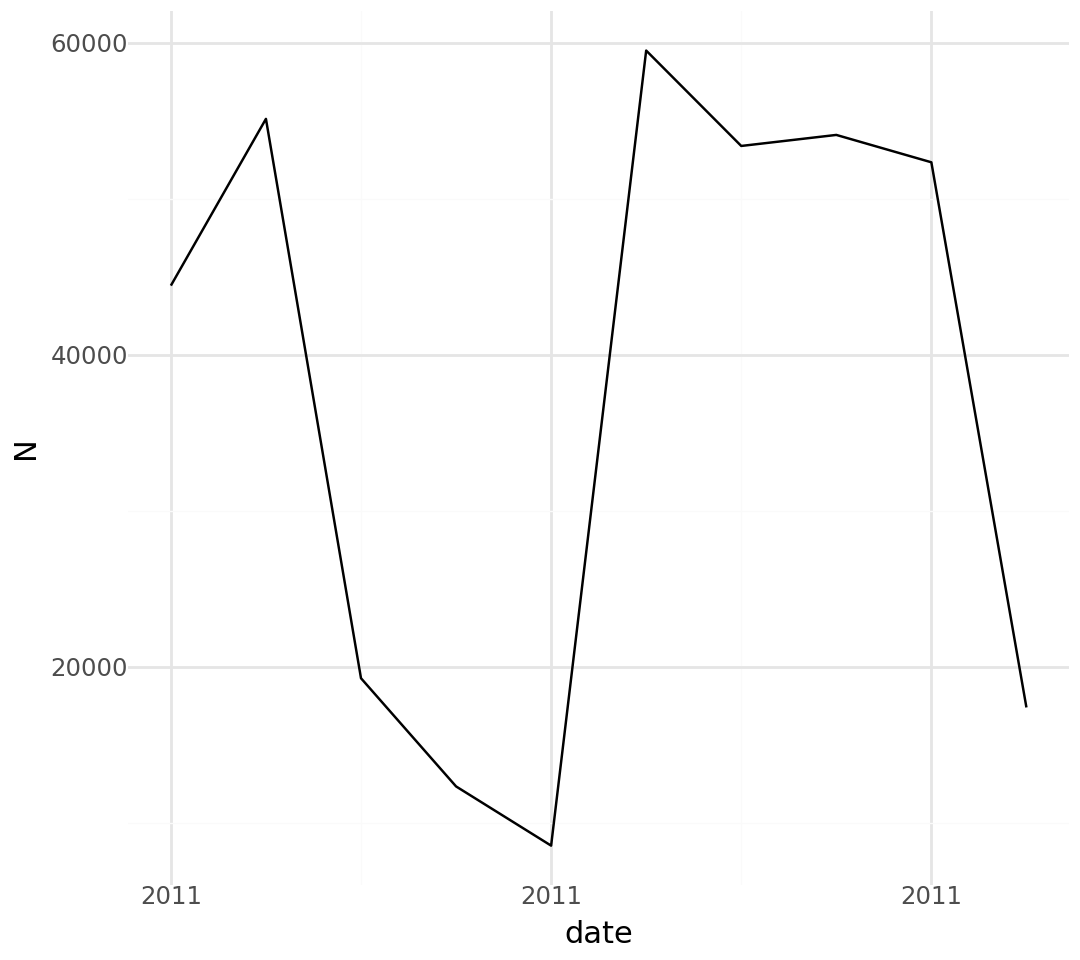

In [6]:
p = ggplot(
  bad_date.assign(date=lambda d: d['date'].astype('datetime64[ns]')),
  aes(x='date', y='N'))
p + geom_line() + scale_x_date(date_labels='%Y')

## Fig. A.6

NOTE: if you cannot download the csv file, try the following code before downloading.

```python
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
```

In [7]:
url = "https://cdn.rawgit.com/kjhealy/viz-organdata/master/organdonation.csv"
bad_year = pd.read_csv(url)
bad_year[lambda d: d.columns[:3]].head(n=10)

,country,year,donors
0,Australia,NaN,NaN
1,Australia,1991.0,12.09
2,Australia,1992.0,12.35
3,Australia,1993.0,12.51
4,Australia,1994.0,10.25
5,Australia,1995.0,10.18
6,Australia,1996.0,10.59
7,Australia,1997.0,10.26
8,Australia,1998.0,10.48
9,Australia,1999.0,8.67


/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


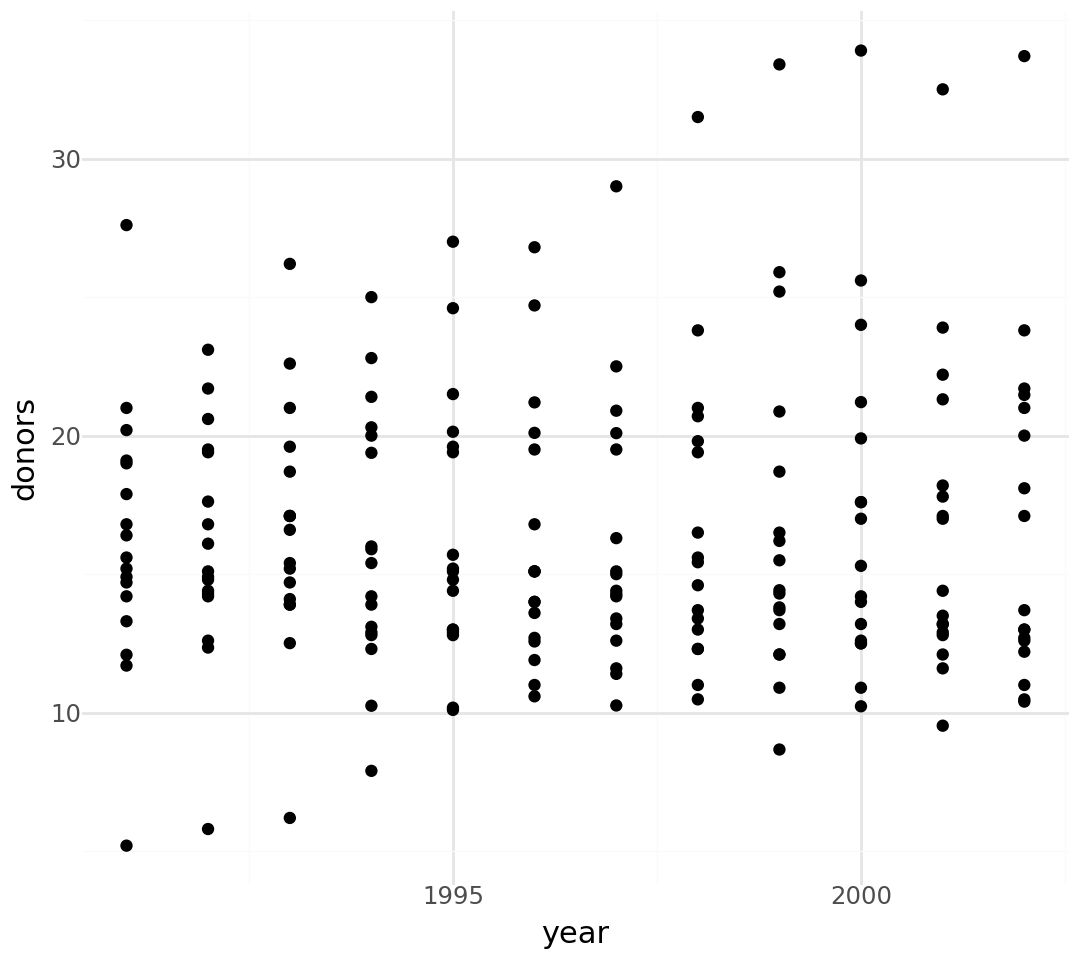

In [8]:
p = ggplot(bad_year, aes(x='year', y='donors'))
p + geom_point()
# Improvements for plotnine has some options.
# option 1: change of label format.
p = ggplot(bad_year, aes(x='year', y='donors'))
p + geom_point() + scale_x_continuous(labels=lambda x: x.astype(int))
# Option 2: parse `year` column as date and then specify the x-axis scale format
ggplot(
  bad_year.assign(year=lambda d: pd.to_datetime(d['year'], format='%Y')),
  aes(x='year', y='donors')
) + geom_point() + scale_x_datetime(date_labels='%Y')

## Fig. A.7

NOTE: The natural cubic spline `ns()` is replaced with `cr()`, which is provided by [patsy](https://patsy.readthedocs.io/en/latest/spline-regression.html#natural-and-cyclic-cubic-regression-splines).

NOTE: If you want to draw multiple ggplot2 graphs in single notebook cell, you neeed to use `.draw();` method. In this case, `plot_section()` function return `ggplot` object. So just add `.draw();` to the tail of this function.

In [9]:
def plot_section(
  section="Culture", x="Year", y="Members", data=asasec, smooth=False
  ):
  p = ggplot(data.loc[lambda d: d['Sname']==section], aes(x=x, y=y))
  if smooth:
    p0 = p + geom_smooth(
      color="#999999", size=1.2, method='lm', formula='y ~ cr(x, 3)'
    ) + scale_x_continuous(breaks = np.linspace(2005, 2015, 4)
    ) + labs(title=section)
  else:
    p0 = p + geom_line(color="#E69F00", size=1.2
    ) + scale_x_continuous(breaks = np.linspace(2005, 2015, 4)
    ) + labs(title=section)
  return p0

In [10]:
plot_section("Rationality").draw();
plot_section("Sexualities", smooth=True).draw();

## Fig. A.8

In [11]:
def plot_section(
  section="Culture", x="Year", y="Members", data=asasec, smooth=False, **kwargs
  ):
  # Python cannot override the duplicated arguments
  for k,v in {
    'color': "#999999", 'size': 1.2, 'method': 'lm',
    'formula': 'y ~ bs(x, 3)'}.items():
    kwargs[k] = kwargs.get(k, v)
  if kwargs['method'] not in ['lm', 'ols', 'rlm', 'gls', 'glm', 'wls']:
    del kwargs['formula']
  
  p = ggplot(data.loc[lambda d: d['Sname']==section], aes(x=x, y=y))
  if smooth:
    p0 = p + geom_smooth(**kwargs
    ) + scale_x_continuous(breaks = np.linspace(2005, 2015, 4)
    ) + labs(title=section)
  else:
    p0 = p + geom_line(color="#E69F00", size=1.2
    ) + scale_x_continuous(breaks = np.linspace(2005, 2015, 4)
    ) + labs(title=section)
  return p0

In [12]:
plot_section("Comm/Urban", smooth=True, method="loess").draw();
plot_section("Children", smooth=True, method="lm", formula='y ~ cr(x, 3)').draw();